#### Case 1: Isobaric evaporation of liquid hydrogen in a 4.89 $m^3$ spherical tank experiments.

This notebook sets up the isobaric evaporation of liquid hydrogen ($LH_2$) in a 4.89 $m^3$ storage tank. A high liquid filling, high heat ingress scenario from Hasan (1991) is considered. This tank is representative of lab-scale tanks used for cryogen evaporation experiments that measure boil-off rates and thermal stratification.

In [961]:
# Ensure that python finds the submodules
import sys
sys.path.append("..") # Adds higher directory to python modules path.

# Scientific computing
import numpy as np

# Visualisation
import matplotlib.pyplot as plt

## Module imports
# Import the storage tank Class
from cryoevap.storage_tanks import Tank

# Import Cryogen class
from cryoevap.cryogens import Cryogen

from scipy.integrate import simps

from mpltools import annotation

#### Setup tank and cryogen properties

In [962]:
# LNG tank properties
Q_roof = 0 # Roof heat ingress / W
d_i = 2.106 # Internal diameter / m
d_o = 2.106+2.08e-3   # External diameter / m
T_air = 350 # Temperature of the environment K

# Set overall heat transfer coefficient through the walls for liquid and vapour
U_L = 0.01063 # W/m2/K
U_V = 0.01063 # W/m2/K

# Specify heat transfer rate at the bottom to prevent ground heating
Q_b = 0 # W, 

# Spherical tank volume
V_tank = 4.89 #m^3

# Initial liquid filling / Dimensionless
LF = 0.50

# Specify tank operating pressure
P = 117e3 # Pa

Geo_v1 = "spherical"
Geo_l1 = "spherical"

Geo_v2 = "cylindrical"
Geo_l2 = "cylindrical"

# Initialize large-scale tank
small_tank1 = Tank(d_i, d_o, V_tank, Geo_v1, Geo_l1,LF)
small_tank1.set_HeatTransProps(U_L, U_V, T_air, Q_roof, Q_b, eta_w = 0.95)

small_tank2 = Tank(d_i, d_o, V_tank, Geo_v2, Geo_l2,LF)
small_tank2.set_HeatTransProps(U_L, U_V, T_air, Q_roof, Q_b, eta_w = 0.95)

# Initialise cryogen
hydrogen1 = Cryogen(name = "hydrogen")
hydrogen1.set_coolprops(P)

hydrogen2 = Cryogen(name='hydrogen')
hydrogen2.set_coolprops(P)

# Set cryogen
small_tank1.cryogen = hydrogen1
small_tank2.cryogen = hydrogen2

# Calculate initial evaporation rate
print("The initial evaporation rate of " + hydrogen1.name + " is %.1e kg/h" % (small_tank1.b_l_dot * 3600))
print("The initial evaporation rate of " + hydrogen2.name + " is %.1e kg/h" % (small_tank2.b_l_dot * 3600))

The initial evaporation rate of hydrogen is 3.8e-01 kg/h
The initial evaporation rate of hydrogen is 2.6e-01 kg/h


Calculate initial evaporation rate and transient period

In [963]:
# Calculate initial evaporation rate
print("The initial evaporation rate of " + hydrogen1.name + " is %.1e kg/h" % (small_tank1.b_l_dot * 3600))

# Estimate transient period duration
print("Transient period = %.3f s " % small_tank1.tau)

# Minimum number of hours to achieve steady state 
tau_h1 = (np.floor(small_tank1.tau / 3600) + 1)

# Print simulation time of the transient period for short-term storage
print("Simulation time: %.0i h" % tau_h1 )

# Calculate boil-off rate
BOR1 = (small_tank1.b_l_dot * 24 * 3600) / (small_tank1.V * small_tank1.LF * small_tank1.cryogen.rho_L)
print("BOR = %.3f %%" % (BOR1 * 100),'\n')

# Calculate initial evaporation rate
print("The initial evaporation rate of " + hydrogen2.name + " is %.1e kg/h" % (small_tank2.b_l_dot * 3600))

# Estimate transient period duration
print("Transient period = %.3f s " % small_tank2.tau)

# Minimum number of hours to achieve steady state 
tau_h2 = (np.floor(small_tank2.tau / 3600) + 1)

# Print simulation time of the transient period for short-term storage
print("Simulation time: %.0i h" % tau_h2 )

# Calculate boil-off rate
BOR2 = (small_tank2.b_l_dot * 24 * 3600) / (small_tank2.V * small_tank2.LF * small_tank2.cryogen.rho_L)
print("BOR = %.3f %%" % (BOR2 * 100))

The initial evaporation rate of hydrogen is 3.8e-01 kg/h
Transient period = 52153.951 s 
Simulation time: 15 h
BOR = 5.367 % 

The initial evaporation rate of hydrogen is 2.6e-01 kg/h
Transient period = 52200.131 s 
Simulation time: 15 h
BOR = 3.574 %


#### Simulation setup and execution

In [964]:
# Define vertical spacing
dz = 0.005

# Calculate number of nodes
n_z = 1 + int(np.round(small_tank1.l_V/dz, 0))

# Define dimensionless computational grid
small_tank1.z_grid = np.linspace(0, 1, n_z)

# Insulated roof
small_tank1.U_roof = 0

# Define evaporation time as twice as the transient period
#evap_time = 3600 *tau_h1*2
evap_time = 3600*0.5

# Time step to record data, relevant for plotting integrated quantities
# such as the vapour to liquid heat transfer rate, Q_VL
small_tank1.time_interval = 60

# Time step to plot each vapour temperature profile
small_tank1.plot_interval = evap_time/6

# Simulate the evaporation
small_tank1.evaporate(evap_time)

# Calculate number of nodes
n_z2 = 1 + int(np.round(small_tank2.l_V/dz, 0))

# Define dimensionless computational grid
small_tank2.z_grid = np.linspace(0, 1, n_z2)

# Insulated roof
small_tank2.U_roof = 0

# Define evaporation time as twice as the transient period
#evap_time = 3600 *tau_h1*2
evap_time = 3600*0.5

# Time step to record data, relevant for plotting integrated quantities
# such as the vapour to liquid heat transfer rate, Q_VL
small_tank2.time_interval = 60

# Time step to plot each vapour temperature profile
small_tank2.plot_interval = evap_time/6

# Simulate the evaporation
small_tank2.evaporate(evap_time)

#### Visualisation of results

#### Vapour temperature

(20.86, 21.0)

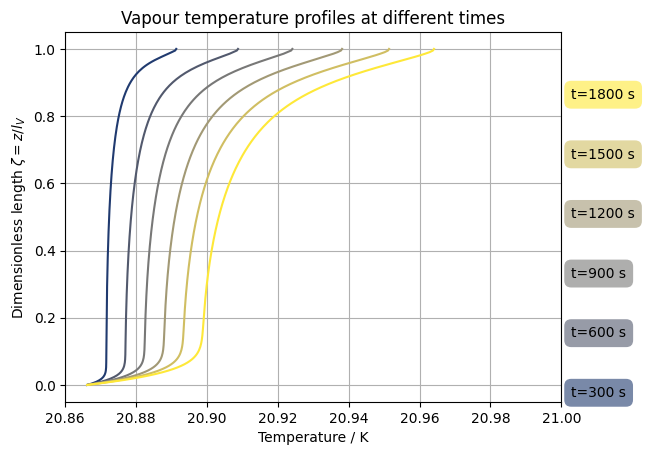

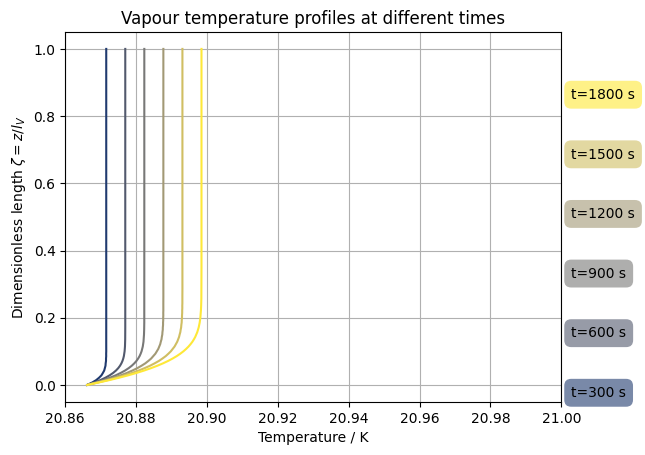

In [965]:
# Visualise the plot
small_tank1.plot_tv()
#plt.ylim((0,0.3))
plt.xlim((20.86,21))
small_tank2.plot_tv()
plt.xlim((20.86,21))

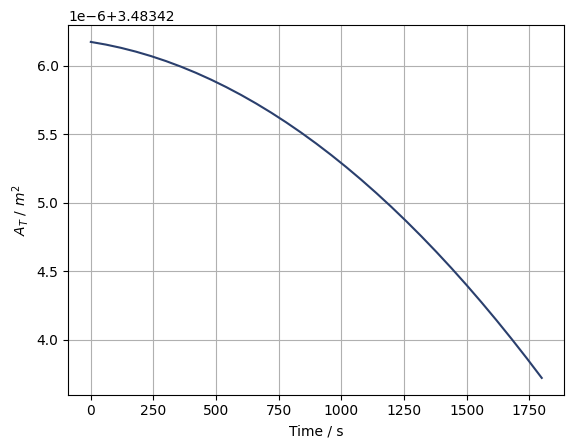

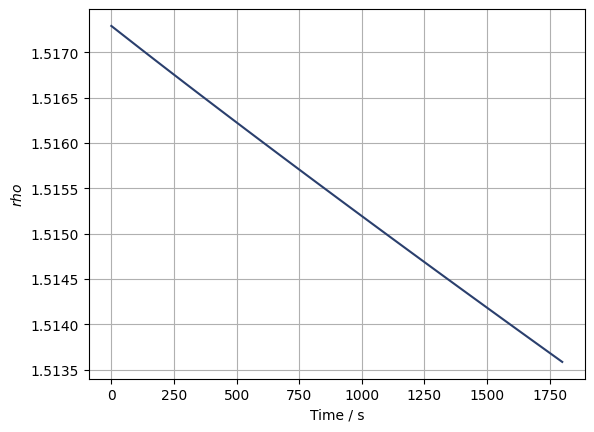

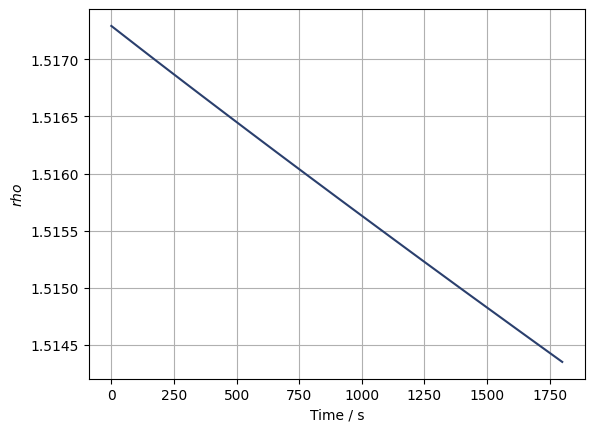

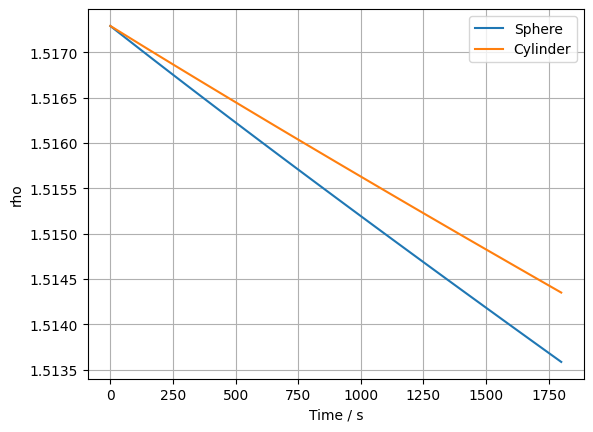

In [966]:
small_tank1.plot_A_T()
small_tank1.plot_rho_V_avg()
small_tank2.plot_rho_V_avg()
plt.plot(small_tank1.data['Time'],small_tank1.data['rho_V_avg'],small_tank2.data['Time'],small_tank2.data['rho_V_avg'])
plt.legend(['Sphere','Cylinder'])
plt.xlabel('Time / s')
plt.ylabel('rho')
plt.grid(True)

Visualise liquid and vapour heat ingresses, $\dot{Q}_{\text{L}}$ and  $\dot{Q}_{\text{V}}$.

The plot also shows the vapour to liquid heat ingress, $\dot{Q}_{VL}$, and  the partition of the vapour heat ingress that is transferred to the interface by the wall directly, $\dot{Q}_{\text{V,w}}$

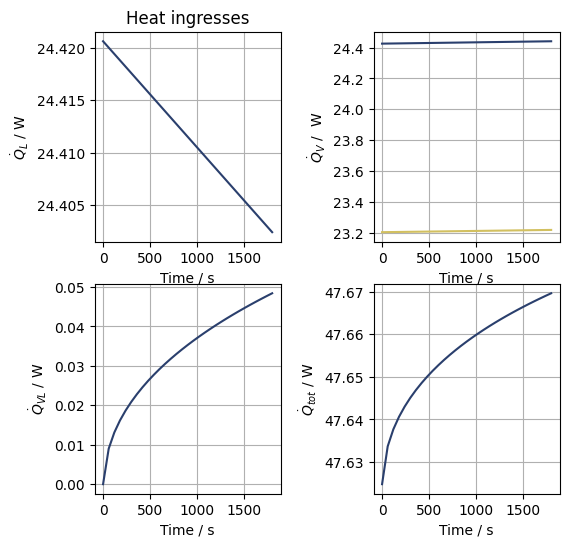

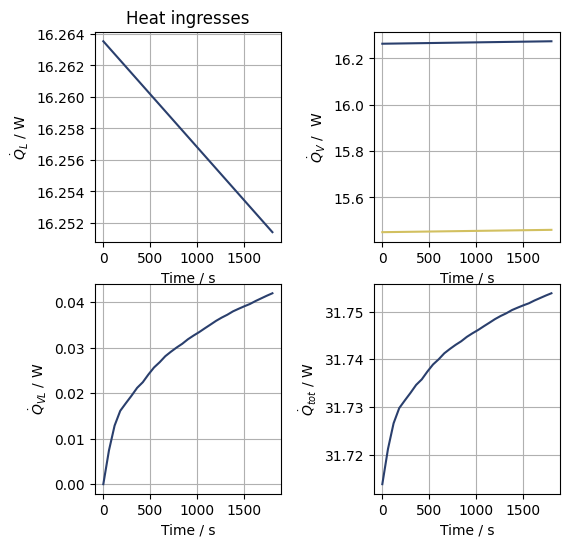

In [967]:
# Provide optional parameter unit to
# accommodate the scale of the experiment
small_tank1.plot_Q(unit="W")
small_tank2.plot_Q(unit='W')

#### Plot liquid volume

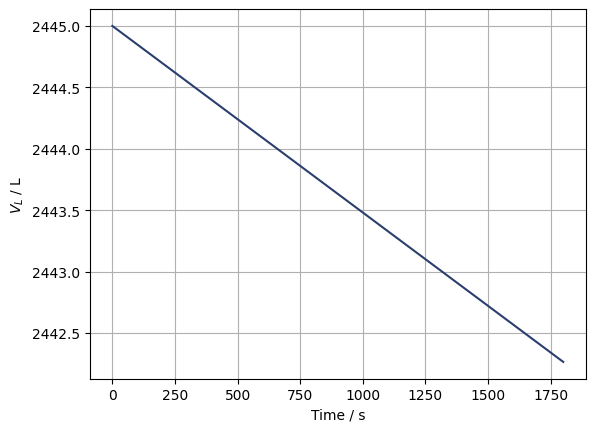

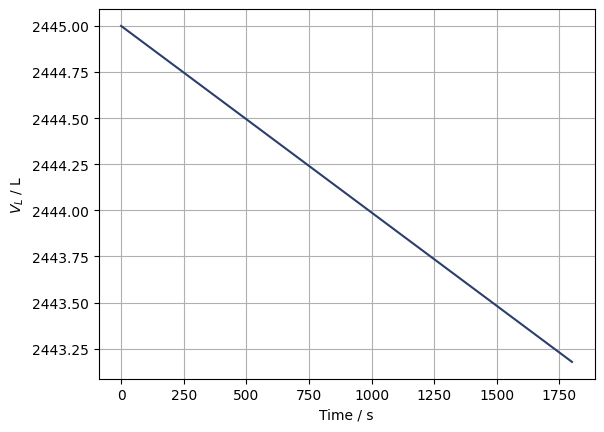

Text(0, 0.5, '$V_L$ / $m^3$')

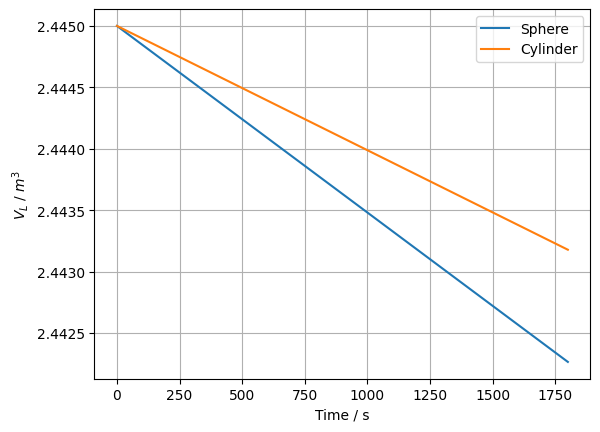

In [968]:
# Provide optional parameter unit to
# accommodate the scale of the experiment
small_tank1.plot_V_L(unit="L")
small_tank2.plot_V_L(unit='L')
plt.plot(small_tank1.data['Time'],small_tank1.data['V_L'],small_tank2.data['Time'],small_tank2.data['V_L'])
plt.grid(True)
plt.legend(['Sphere','Cylinder'])
plt.xlabel('Time / s')
plt.ylabel('$V_L$ / $m^3$')

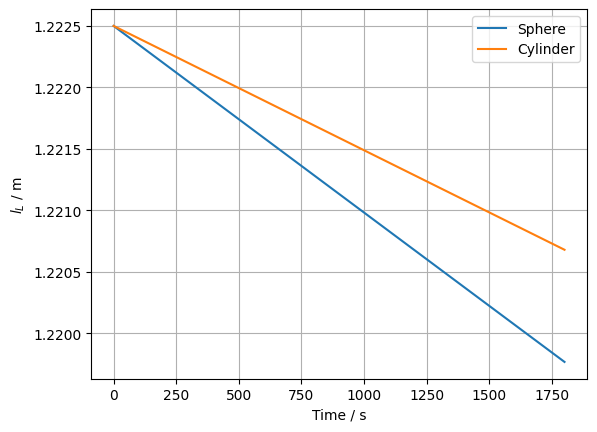

In [969]:
plt.plot(small_tank1.data['Time'],small_tank1.data['V_L']*small_tank1.data['LF'],small_tank2.data['Time'],small_tank2.data['V_L']*small_tank2.data['LF'])
plt.grid(True)
plt.xlabel('Time / s')
plt.ylabel('$l_L$ / m')
plt.legend(['Sphere','Cylinder'])

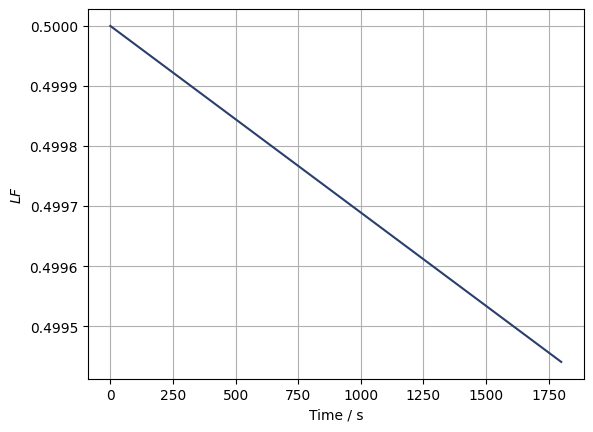

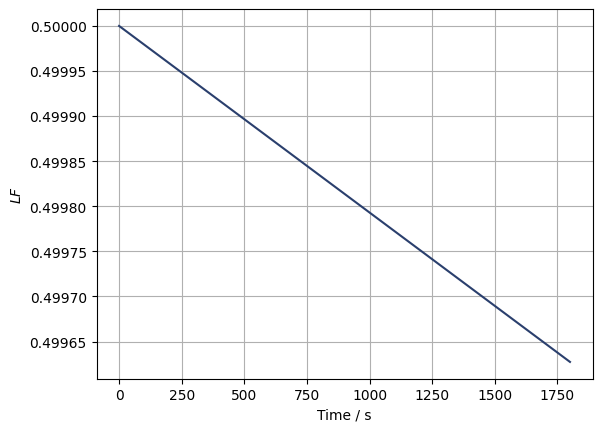

Text(0, 0.5, 'LF')

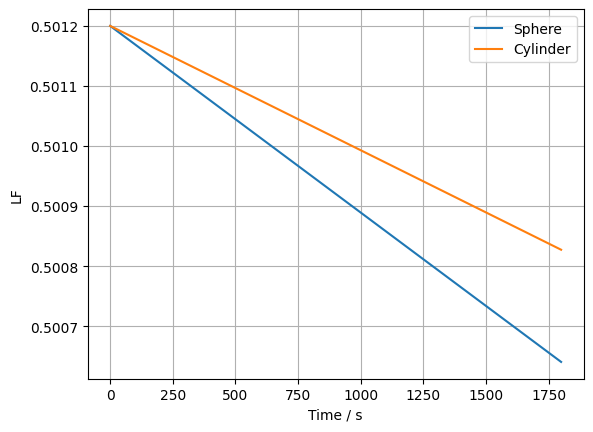

In [970]:
small_tank1.plot_LF()
small_tank2.plot_LF()
plt.plot(df_evap['Time'],df_evap['LF'],df_evap2['Time'],df_evap2['LF'])
plt.legend(['Sphere','Cylinder'])
plt.grid(True)
plt.xlabel('Time / s')
plt.ylabel('LF')

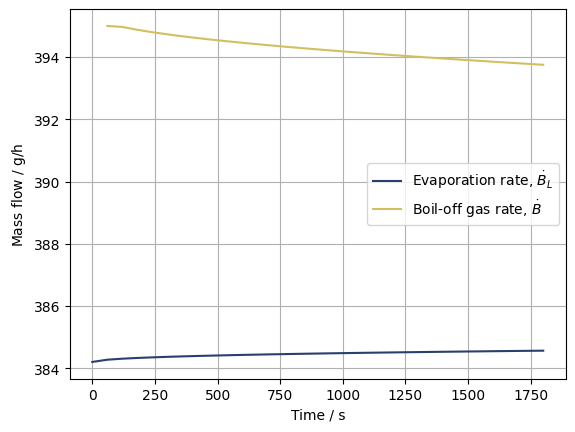

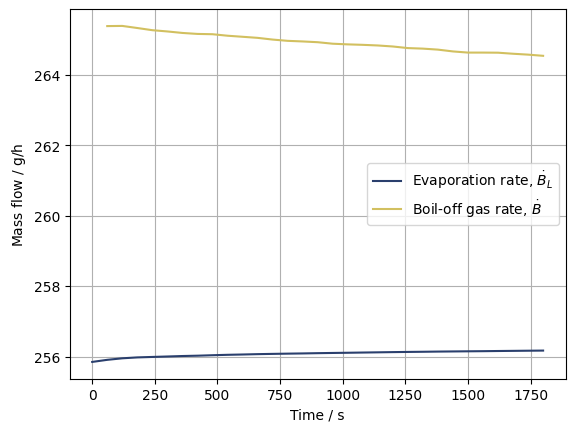

In [971]:
# Provide optional parameter unit to
# accommodate the scale of the experiment
small_tank1.plot_BOG(unit='g/h')
small_tank2.plot_BOG(unit='g/h')

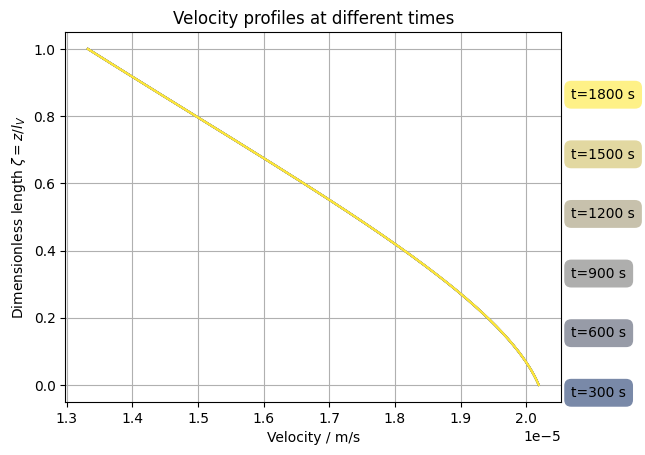

In [972]:
small_tank1.plot_vz()

In [982]:
print(small_tank2.v_z)

1.3445369570647906e-05


In [973]:
small_tank1.data["Pressure"] = np.ones_like(small_tank1.data["B_L"])*P
air = P*(V_tank*(1-LF))/(8.314*hydrogen1.T_sat)
for i in range(1,len(small_tank1.data["B_L"])):
    small_tank1.data["Pressure"][i] = ((simps(small_tank1.data["B_L"][:i])*(1000/2) +air)*8.314*small_tank1.data["Tv_avg"][i])/(V_tank - small_tank1.data["V_L"][i])

Optional: CSV data export

If evaporation data is intended to be post-processed in another software, it can be exported readily with the help of the Pandas package.

In [974]:
# Import pandas 
import pandas as pd

In [975]:
# Create dataframe from dictionary
df_evap = pd.DataFrame.from_dict(small_tank1.data)
df_evap2 = pd.DataFrame.from_dict(small_tank2.data)
# Save file to the current working directory
df_evap.to_csv('LN2_small_m3.csv')

In [976]:
df_evap['flux_v'] = df_evap["Q_V"]/(np.pi*d_i*(d_i-df_evap['z']))
df_evap['flux_l'] = df_evap["Q_L"]/(np.pi*d_i*(df_evap['z']))
df_evap['total_flux'] = (df_evap['Q_L']+df_evap['Q_V'])/(np.pi*d_i**2)

In [977]:
df_evap["SCHM BOG"] = ((df_evap["BOG"]*1000*3600/2)*(273+15)*8.314)/101325
df_evap2["SCHM BOG"] = ((df_evap2["BOG"]*1000*3600/2)*(273+15)*8.314)/101325
df_evap[-5:]

,Time,Tv_avg,rho_V_avg,Q_VL,Q_L,Q_V,V_L,B_L,BOG,drho_V_avg,...,A_T,vz_avg,LF,dTV_avg,Q_Vw,Pressure,flux_v,flux_l,total_flux,SCHM BOG
26,1560.0,20.899672,1.514063,0.045398,24.404847,24.438757,2.442629,0.000107,0.000109,-0.000002,...,3.483424,0.000018,0.499515,0.000021,23.216819,117168.988671,3.505248,3.505609,3.505428,4.653814
27,1620.0,20.900917,1.513944,0.046177,24.404240,24.439271,2.442538,0.000107,0.000109,-0.000002,...,3.483424,0.000018,0.499497,0.000021,23.217308,117175.397461,3.505234,3.505609,3.505422,4.653454
28,1680.0,20.902161,1.513824,0.046937,24.403634,24.439785,2.442447,0.000107,0.000109,-0.000002,...,3.483424,0.000018,0.499478,0.000021,23.217796,117181.793015,3.505221,3.505610,3.505415,4.653105
29,1740.0,20.903402,1.513705,0.047682,24.403027,24.440300,2.442356,0.000107,0.000109,-0.000002,...,3.483424,0.000018,0.499459,0.000021,23.218285,117188.176209,3.505208,3.505610,3.505408,4.652760
30,1800.0,20.904640,1.513586,0.048411,24.402420,24.440815,2.442265,0.000107,0.000109,-0.000002,...,3.483424,0.000018,0.499441,0.000021,23.218774,117194.546541,3.505194,3.505610,3.505402,4.652406


In [978]:
df_evap2.columns

Index(['Time', 'Tv_avg', 'rho_V_avg', 'Q_VL', 'Q_L', 'Q_V', 'V_L', 'B_L',
       'BOG', 'drho_V_avg', 'dV_L', 'z', 'LF', 'dTV_avg', 'Q_Vw', 'SCHM BOG'],
      dtype='object')

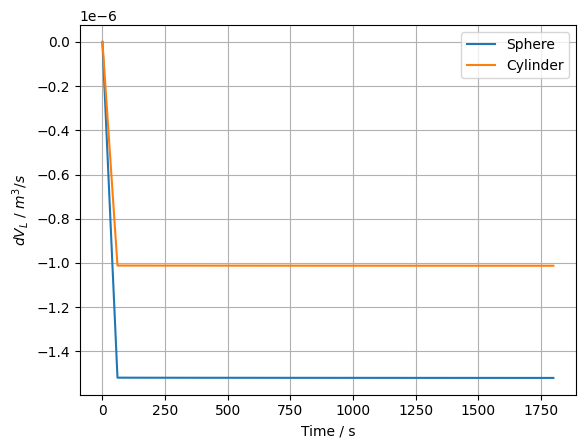

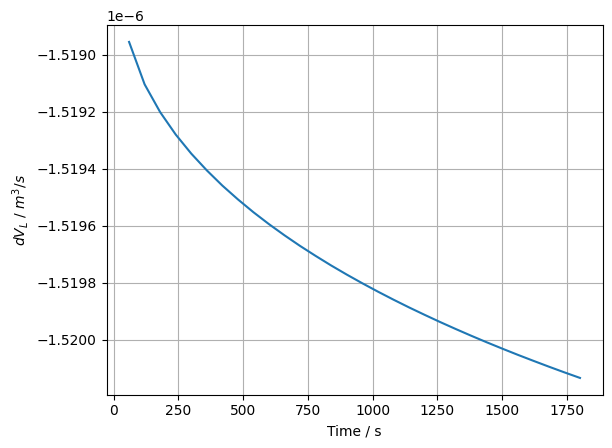

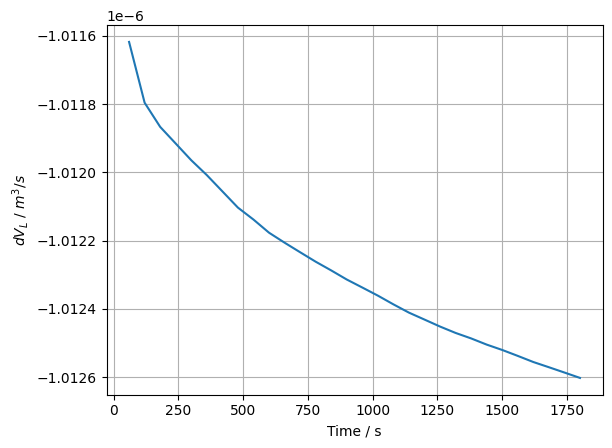

In [979]:
plt.plot(df_evap['Time'],df_evap['dV_L'],df_evap2['Time'],df_evap2['dV_L'])
plt.legend(['Sphere','Cylinder'])
plt.grid(True)
plt.xlabel('Time / s')
plt.ylabel('$dV_L$ / $m^3/s$')
plt.figure()
plt.plot(df_evap['Time'][1:],df_evap['dV_L'][1:])
plt.xlabel('Time / s')
plt.ylabel('$dV_L$ / $m^3/s$')
plt.grid(True)
plt.figure()
plt.plot(df_evap2['Time'][1:],df_evap2['dV_L'][1:])
plt.xlabel('Time / s')
plt.ylabel('$dV_L$ / $m^3/s$')
plt.grid(True)

In [980]:
assert(df_evap['Time']==df_evap2['Time']).all()

Text(0, 0.5, '$dT_{v, avg}$ / K/s')

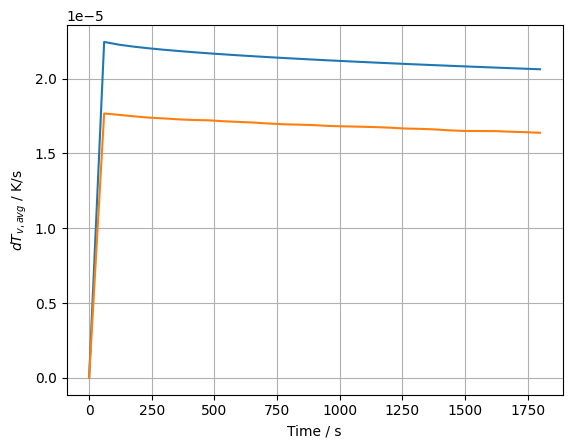

In [981]:
plt.plot(df_evap['Time'],df_evap['dTV_avg'])
plt.plot(df_evap2['Time'],df_evap2['dTV_avg'])
plt.grid(True)
plt.xlabel('Time / s')
plt.ylabel('$dT_{v, avg}$ / K/s')

#### References



Hasan, M., Lin, C. and Van Dresar, N. (1991). Self-Pressurization of a Flightweight Liquid Hydrogen Storage Tank Subjected to Low Heat Flux. [online] Available at: https://ntrs.nasa.gov/api/citations/19910011011/downloads/19910011011.pdf [Accessed 2 Jul. 2024].

Wang, Z. and Mérida, W. (2024). Thermal performance of cylindrical and spherical liquid hydrogen tanks. International Journal of Hydrogen Energy, 53, pp.667–683. doi:https://doi.org/10.1016/j.ijhydene.2023.11.287.